<a href="https://colab.research.google.com/github/theKirill/GensimSample/blob/master/Practice_with_stopwords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import gensim

In [0]:
from gensim.models import Word2Vec

In [0]:
import pandas as pd

In [0]:
file_csv = pd.read_csv('drive/My Drive/ForGensim/train.csv')

In [143]:
print(file_csv['text'])

0        Add another song to the Cita RomГЎntica playli...
1         add clem burke in my playlist Pre-Party R&B Jams
2                  Add Live from Aragon Ballroom to Trapeo
3                        add Unite and Win to my night out
4                      Add track to my Digster Future Hits
                               ...                        
15879    Is Across the Line playing at the closest movi...
15880    Which animated movies are playing in the neigh...
15881          Where is They Always Return at Dawn playing
15882       What is the movie schedule in the neighborhood
15883    Tell me when Howling II: Your Sister Is a Were...
Name: text, Length: 15884, dtype: object


In [0]:
intents = file_csv.intents.unique()

In [216]:
intents

array(['AddToPlaylist', 'BookRestaurant', 'GetWeather', 'PlayMusic',
       'RateBook', 'SearchCreativeWork', 'SearchScreeningEvent'],
      dtype=object)

In [0]:
COUNT_CLASSES = intents.shape[0]

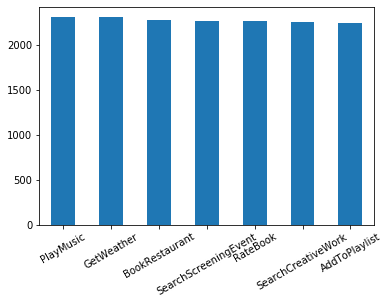

In [13]:
file_csv.intents.value_counts().plot(kind="bar", rot=30)

In [0]:
tokens = []
sentences = file_csv['text']
for sentence in sentences:
  tokens.append(sentence.split())

In [46]:
tokens

[['Add', 'another', 'song', 'to', 'the', 'Cita', 'RomГЎntica', 'playlist.'],
 ['add', 'clem', 'burke', 'in', 'my', 'playlist', 'Pre-Party', 'R&B', 'Jams'],
 ['Add', 'Live', 'from', 'Aragon', 'Ballroom', 'to', 'Trapeo'],
 ['add', 'Unite', 'and', 'Win', 'to', 'my', 'night', 'out'],
 ['Add', 'track', 'to', 'my', 'Digster', 'Future', 'Hits']]

In [0]:
model = Word2Vec(tokens, size=200, window=10, min_count=3, workers=4)

In [54]:
model.train(tokens, total_examples=len(tokens), epochs=500)

(42148015, 71074500)

In [62]:
model.most_similar('song')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('track', 0.755196213722229),
 ('tune', 0.6781189441680908),
 ('artist', 0.5296145677566528),
 ('album', 0.5135484933853149),
 ('ep', 0.4719415307044983),
 ('el', 0.43413981795310974),
 ('Laine', 0.43173277378082275),
 ('NoctГЎmbulo', 0.429962694644928),
 ("Women's", 0.41087841987609863),
 ('Trapeo', 0.4073360562324524)]

In [149]:
model.most_similar(positive=['song'], negative=['artist'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('soundtrack', 0.3845045566558838),
 ('concerto', 0.3793002963066101),
 ('melody', 0.33555158972740173),
 ('1957', 0.33188682794570923),
 ('symphony', 0.3107365369796753),
 ('movement', 0.30384108424186707),
 ('ballad', 0.29994726181030273),
 ('record', 0.29545238614082336),
 ('Make', 0.27922457456588745),
 ('Diamond', 0.2778102159500122)]

In [0]:
word_vectors = model.wv

In [57]:
print("Number of word vectors: {}".format(len(word_vectors.vocab)))

Number of word vectors: 3762


In [58]:
word_vectors.vocab

{'Add': <gensim.models.keyedvectors.Vocab at 0x7fd2aa99fdd8>,
 'another': <gensim.models.keyedvectors.Vocab at 0x7fd2aa99fd68>,
 'song': <gensim.models.keyedvectors.Vocab at 0x7fd2a3e935f8>,
 'to': <gensim.models.keyedvectors.Vocab at 0x7fd2a3e93630>,
 'the': <gensim.models.keyedvectors.Vocab at 0x7fd2a3e93668>,
 'playlist.': <gensim.models.keyedvectors.Vocab at 0x7fd2a3e936a0>,
 'add': <gensim.models.keyedvectors.Vocab at 0x7fd2a3e936d8>,
 'burke': <gensim.models.keyedvectors.Vocab at 0x7fd2a3e93710>,
 'in': <gensim.models.keyedvectors.Vocab at 0x7fd2a3e93748>,
 'my': <gensim.models.keyedvectors.Vocab at 0x7fd2a3e93780>,
 'playlist': <gensim.models.keyedvectors.Vocab at 0x7fd2a3e937b8>,
 'Pre-Party': <gensim.models.keyedvectors.Vocab at 0x7fd2a3e937f0>,
 'R&B': <gensim.models.keyedvectors.Vocab at 0x7fd2a3e93828>,
 'Jams': <gensim.models.keyedvectors.Vocab at 0x7fd2a3e93860>,
 'Live': <gensim.models.keyedvectors.Vocab at 0x7fd2a3e93898>,
 'from': <gensim.models.keyedvectors.Vocab at 0

In [59]:
import keras

Using TensorFlow backend.


In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Activation
from keras.models import Model

In [0]:
import sklearn

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from keras.utils import to_categorical

In [0]:
import numpy as np

In [0]:
texts = file_csv.text

In [0]:
word_vectors = model.wv
vocab_size = len(word_vectors.vocab)
token = Tokenizer(vocab_size)
token.fit_on_texts(texts)
text = token.texts_to_sequences(texts)
text = pad_sequences(text, maxlen=10)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(text, file_csv['intents'], test_size=0.2, stratify=file_csv['intents'])

In [0]:
y_train = transofrm_to_categorical(y_train)

In [0]:
y_test =  transofrm_to_categorical(y_test)

In [238]:
my_model = get_model(model)
my_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 200)         752400    
_________________________________________________________________
dropout_8 (Dropout)          (None, None, 200)         0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 50)          30050     
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 250)               12750     
_________________________________________________________________
dropout_9 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_4 (Activation)    (None, 250)              

In [239]:
my_model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test))

Train on 12707 samples, validate on 3177 samples
Epoch 1/5
12707/12707 [==============================] - 3s 213us/step - loss: 0.4680 - acc: 0.8411 - val_loss: 0.1293 - val_acc: 0.9556
Epoch 2/5
12707/12707 [==============================] - 2s 180us/step - loss: 0.1335 - acc: 0.9566 - val_loss: 0.1037 - val_acc: 0.9644
Epoch 3/5
12707/12707 [==============================] - 2s 177us/step - loss: 0.0912 - acc: 0.9719 - val_loss: 0.0928 - val_acc: 0.9701
Epoch 4/5
12707/12707 [==============================] - 2s 175us/step - loss: 0.0675 - acc: 0.9787 - val_loss: 0.1053 - val_acc: 0.9663
Epoch 5/5
12707/12707 [==============================] - 2s 172us/step - loss: 0.0589 - acc: 0.9808 - val_loss: 0.0972 - val_acc: 0.9701


In [0]:
X_predict = []
X_predict.append([ 12,    10,   40,  361,    3, 1924,   19,  559,    1, 1886])# не знаем, как строку преобразовать в вектор чисел
X_predict = np.array(X_predict)

In [0]:
prediction = my_model.predict_classes(X_predict)

In [299]:
answers = transform_from_categorical(prediction)
answers

['GetWeather']

In [0]:
# Создание модели
def get_model(model):
    kmodel = Sequential() 
    kmodel.add(model.wv.get_keras_embedding(train_embeddings=True))
    
    kmodel.add(Dropout(0.2))

    kmodel.add(Conv1D(50,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
    kmodel.add(GlobalMaxPooling1D())

    kmodel.add(Dense(250))
    kmodel.add(Dropout(0.2))
    kmodel.add(Activation('relu'))

    kmodel.add(Dense(7, activation = 'softmax'))

    kmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  
    return kmodel

In [0]:
def transform_to_categorical(y):
  intents_for_each_ = y
  intents_to_digit = []

  for intent in intents_for_each_:
    if intent == 'PlayMusic':
      intents_to_digit.append(0)
    elif intent == 'GetWeather':
      intents_to_digit.append(1)
    elif intent == 'BookRestaurant':
      intents_to_digit.append(2)
    elif intent == 'SearchScreeningEvent':
      intents_to_digit.append(3)
    elif intent == 'RateBook':
      intents_to_digit.append(4)
    elif intent == 'SearchCreativeWork':
      intents_to_digit.append(5)
    elif intent == 'AddToPlaylist':
      intents_to_digit.append(6)

  return to_categorical(intents_to_digit, COUNT_CLASSES)

In [0]:
def transform_from_categorical(prediction):
  answers = []

  for elem in prediction:
    if elem == 0:
      answers.append('PlayMusic')
    elif elem == 1:
      answers.append('GetWeather')
    elif elem == 2:
      answers.append('BookRestaurant')
    elif elem == 3:
      answers.append('SearchScreeningEvent')
    elif elem == 4:
      answers.append('RateBook')
    elif elem == 5:
      answers.append('SearchCreativeWork')
    elif elem == 6:
      answers.append('AddToPlaylist')

  return answers